In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir('/content/drive/MyDrive/cxr_IEEE_pre/split')

['train', 'test', 'val']

In [ ]:
train_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train"


In [ ]:
print("Train set:\n========================================")

num_normal = len(os.listdir(os.path.join(train_dir, 'normal')))
num_covid = len(os.listdir(os.path.join(train_dir, 'covid')))

print(f"NORMAL={num_normal}")
print(f"COVID={num_covid}")

Train set:
NORMAL=322
COVID=322


In [ ]:
test_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/test"


In [ ]:
print("Test set:\n========================================")


num_normal = len(os.listdir(os.path.join(test_dir, 'normal')))
num_covid = len(os.listdir(os.path.join(test_dir, 'covid')))


print(f"NORMAL={num_normal}")
print(f"COVID={num_covid}")

Test set:
NORMAL=107
COVID=107


In [ ]:
val_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/val"

In [ ]:
print("Validation set:\n========================================")

print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'normal')))}")
print(f"COVID={len(os.listdir(os.path.join(val_dir, 'covid')))}")


Validation set:
NORMAL=107
COVID=107


In [ ]:
covid = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/covid")
covid_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/covid"


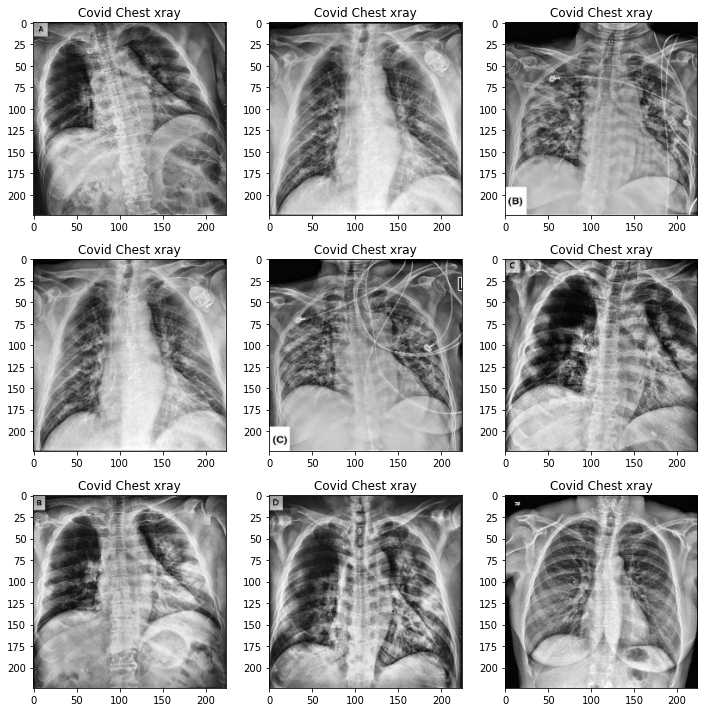

In [ ]:
###covid sample
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(covid_dir, covid[i]))
    plt.imshow(img, cmap='gray')
    plt.title('Covid Chest xray')
    plt.axis('on')
    
plt.tight_layout()

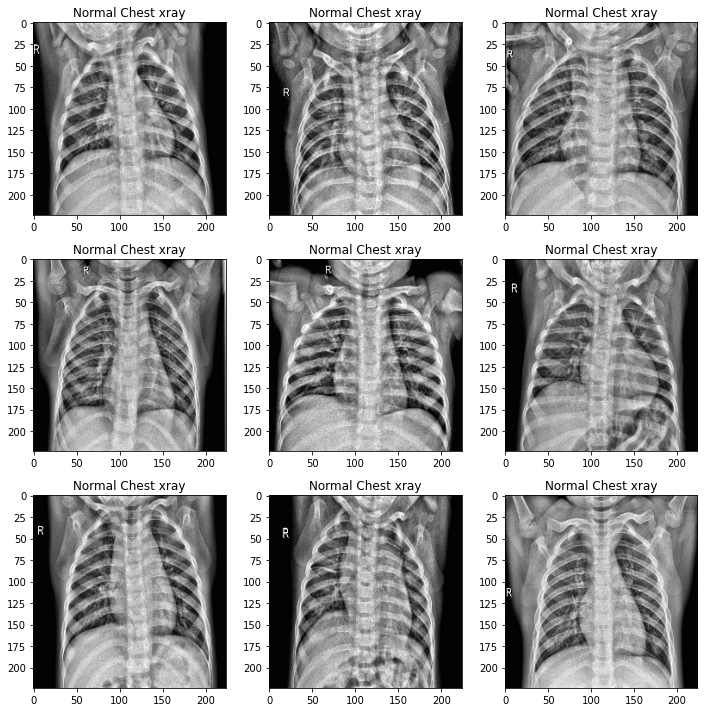

In [ ]:
normal = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal")
normal_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal"

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.title('Normal Chest xray')
    plt.axis('on')
    
plt.tight_layout()

The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 128.2066 and the standard deviation is 55.4064


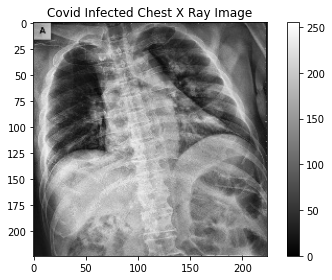

In [ ]:

covid = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/covid")[0]
covid_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/covid"
covid_img = plt.imread(os.path.join(covid_dir, covid))
plt.imshow(covid_img, cmap='gray')
plt.colorbar()
plt.title('Covid Infected Chest X Ray Image')
plt.tight_layout()


print(f"The dimensions of the image are {covid_img.shape[0]} pixels width and {covid_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {covid_img.max():.4f} and the minimum is {covid_img.min():.4f}")
print(f"The mean value of the pixels is {covid_img.mean():.4f} and the standard deviation is {covid_img.std():.4f}")




The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 119.3326 and the standard deviation is 67.9951


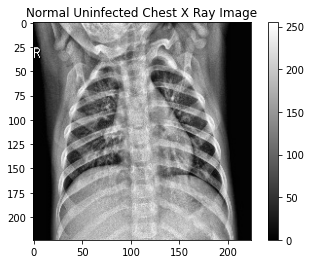

In [ ]:
normal = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal")[0]
normal_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal"
sample_img = plt.imread(os.path.join(normal_dir, normal))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Normal Uninfected Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

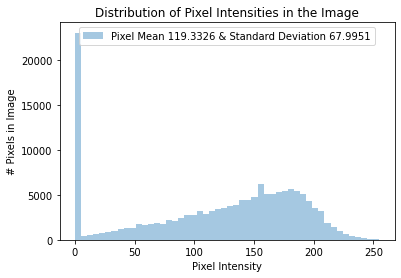

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
#IMAGE_PRE-PROCESSING

from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    vertical_flip = True,
    horizontal_flip= True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=16, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(224, 224))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=16, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(224, 224))


Found 644 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [ ]:
# Class weights

weight_for_0 = num_covid / (num_normal + num_covid)
weight_for_1 = num_normal / (num_normal + num_covid)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.50
Weight for class 1: 0.50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 2.3057 and the minimum is -3.4954
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


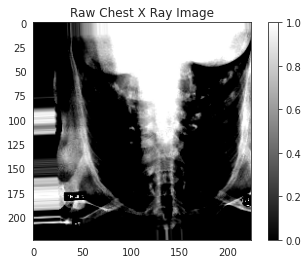

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

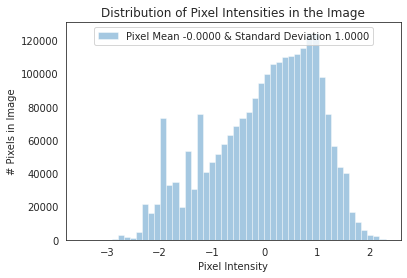

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization




In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))



model.compile(loss =keras.losses.binary_crossentropy, optimizer='adam', metrics=['Accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
##r = model.fit(
    #train, 
    #epochs=100,
    #validation_data=validation
#)

r = model.fit(
    train, 
    epochs=300,
    validation_data=validation,
    class_weight=class_weight
)

Epoch 1/300
41/41 [==============================] - 13s 323ms/step - loss: 0.0592 - Accuracy: 0.9658 - val_loss: 0.3869 - val_Accuracy: 0.8972
Epoch 2/300
41/41 [==============================] - 13s 317ms/step - loss: 0.0640 - Accuracy: 0.9503 - val_loss: 0.1635 - val_Accuracy: 0.9439
Epoch 3/300
41/41 [==============================] - 13s 319ms/step - loss: 0.0677 - Accuracy: 0.9565 - val_loss: 0.1132 - val_Accuracy: 0.9486
Epoch 4/300
41/41 [==============================] - 13s 320ms/step - loss: 0.0494 - Accuracy: 0.9581 - val_loss: 0.0667 - val_Accuracy: 0.9813
Epoch 5/300
41/41 [==============================] - 13s 317ms/step - loss: 0.0458 - Accuracy: 0.9658 - val_loss: 0.1412 - val_Accuracy: 0.9439
Epoch 6/300
41/41 [==============================] - 13s 319ms/step - loss: 0.0404 - Accuracy: 0.9689 - val_loss: 0.0497 - val_Accuracy: 0.9720
Epoch 7/300
41/41 [==============================] - 14s 332ms/step - loss: 0.0397 - Accuracy: 0.9767 - val_loss: 0.0415 - val_Accuracy:

**Plotting the accuracies and the losses**

Text(0.5, 1.0, 'Accuracy Evolution')

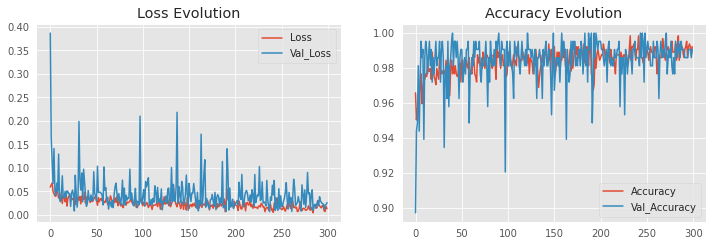

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(2, 2, 2)
plt.plot(r.history['Accuracy'], label='Accuracy')
plt.plot(r.history['val_Accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=16, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(224, 224))

Found 214 images belonging to 2 classes.


In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

14/14 [==============================] - 3s 217ms/step - loss: 0.0702 - Accuracy: 0.9813
Test Accuracy: 98.13%
41/41 [==============================] - 9s 222ms/step - loss: 0.0192 - Accuracy: 0.9938
Train Accuracy: 99.38%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[107   0]
 [  2 105]]


,0,1,accuracy,macro avg,weighted avg
precision,0.981651,1.000000,0.990654,0.990826,0.990826
recall,1.000000,0.981308,0.990654,0.990654,0.990654
f1-score,0.990741,0.990566,0.990654,0.990653,0.990653
support,107.000000,107.000000,0.990654,214.000000,214.000000


In [ ]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[107   0]
 [  3 104]]


,0,1,accuracy,macro avg,weighted avg
precision,0.972727,1.000000,0.985981,0.986364,0.986364
recall,1.000000,0.971963,0.985981,0.985981,0.985981
f1-score,0.986175,0.985782,0.985981,0.985979,0.985979
support,107.000000,107.000000,0.985981,214.000000,214.000000


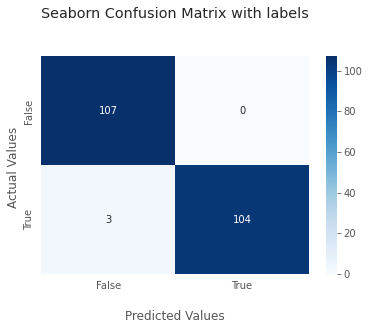

In [ ]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(test.classes, pred > 0.7), annot=True, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

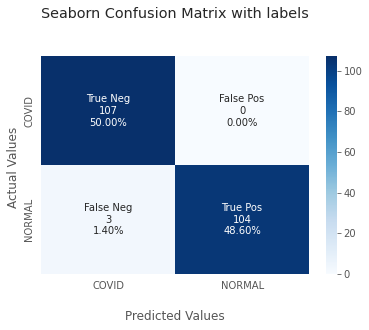

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix(test.classes, pred > 0.7).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(test.classes, pred > 0.7).flatten()/np.sum(confusion_matrix(test.classes, pred > 0.7))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)





ax = sns.heatmap(confusion_matrix(test.classes, pred > 0.7), annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['COVID','NORMAL'])
ax.yaxis.set_ticklabels(['COVID','NORMAL'])

## Display the visualization of the Confusion Matrix.
plt.show()



In [ ]:
train.class_indices


{'covid': 0, 'normal': 1}

In [ ]:
class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
path = "/content/drive/MyDrive/cxr_IEEE_pre/split/test/covid/covid_CLAHE_WB_10.jpg"   

img = image.load_img(path, target_size=(224,224,3))
img = image.img_to_array(img)/255
img= np.array([img])
img.shape

(1, 224, 224, 3)

In [ ]:
res = (model.predict(test) > 0.7).astype("int32")
print(f"The given X-Ray image is of type = {res}")
print()

plt.imshow(img[1], cmap = "gray")
plt.title("input image")
plt.show()

The given X-Ray image is of type = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]

IndexError: ignored

In [ ]:
for images, labels in test_data.take(1):
  images_test = images.numpy()
  labels_test = labels.numpy()

  

AttributeError: ignored

The given X-Ray image is of type = Covid




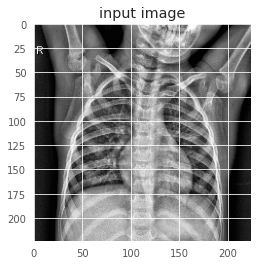

In [ ]:
class_type = {0:'Covid',  1 : 'Normal'}


# path for that new image. ( you can take it either from google or any other scource)
path = "/content/drive/MyDrive/cxr_IEEE_pre/split/test/normal/norm_CLAHE_WB_121.jpg"       # you can add any image path


#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
#print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
#print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()